# Elbow method

* To make the best result of kmeans clustering (to get the meaning of each key points)

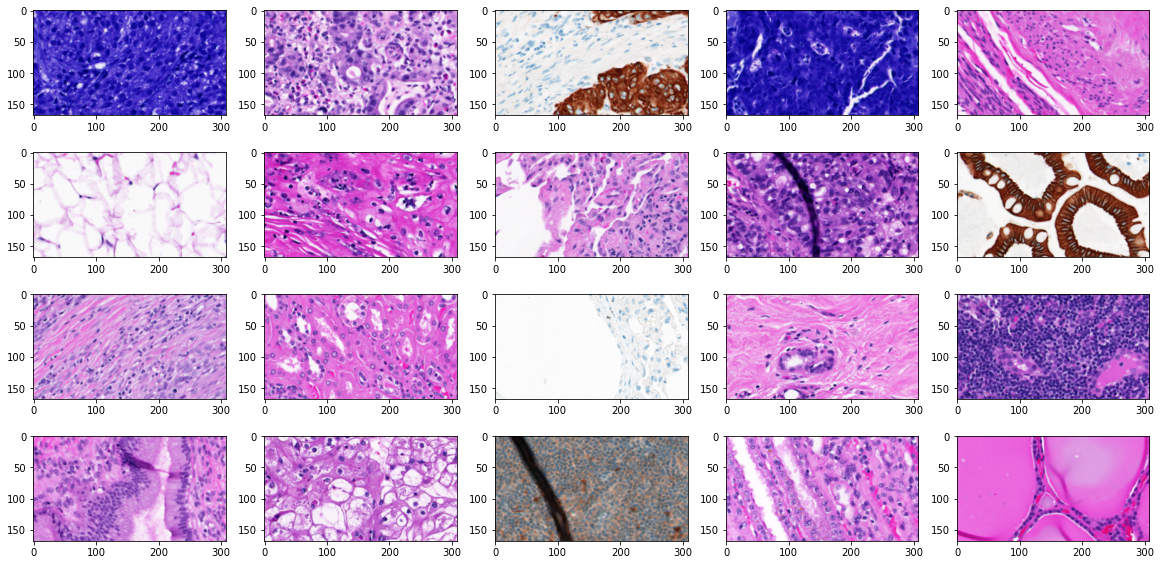

In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt

load = "../Database/KIMIA_Path_960/train/"
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T"]

fig, ax = plt.subplots(2,2, figsize = (20,10))
for n in range(20):
    img = cv2.imread(load+classes[n]+"10.tif")
    plt.subplot(4,5,n+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
load = "../Database/KIMIA_Path_960/train"
all_files=[]
file_label=[]

for root,dirs,files in os.walk(load):
    for file_name in files:
        file = os.path.join(root,file_name)
        label = os.path.join(file_name)
        all_files.append(file)
        file_label.append(label[0])
all_files.remove("../Database/KIMIA_Path_960/train/.DS_Store")
file_label.remove(".")
print(len(all_files))
print(len(file_label))

960
960


In [ ]:
from tqdm import tqdm
from tqdm._tqdm import trange
import time

/Users/alpaca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.std.*` instead of `tqdm._tqdm.*`
  


In [ ]:
# k = 40
# trainer = cv2.BOWKMeansTrainer(k)
detector = cv2.xfeatures2d.SIFT_create()

keypoints = []
distances = []
for i in trange(len(all_files)):
    file = all_files[i]
    image = cv2.imread(file)
    ks, ds = detector.detectAndCompute(image, None)
    time.sleep=0.01
print("keypoints: ",len(keypoints))
print("distances: ",len(distances))

100%|██████████| 960/960 [00:17<00:00, 56.09it/s]

keypoints:  960
distances:  960


In [ ]:
distances = np.array(distances)

/Users/alpaca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
all_keypoints = []
all_distances = []

for m in keypoints:
    for x in m:
        all_keypoints.append(x)
print("all_keypoints", len(all_keypoints))

for m in distances:
    for x in m:
        all_distances.append(x)
print("all_distances", len(all_distances))

all_keypoints 938914
all_distances 938914


In [ ]:
all_distances = np.array(all_distances)
all_distances.shape

(938914, 128)

In [ ]:
np.save("ds.npy", distances)

In [ ]:
someds = all_distances[:1000]

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #用scipy求解距离

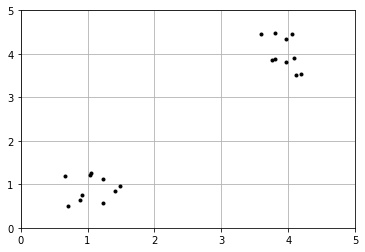

In [ ]:
#随机生成一个实数，范围在（0.5,1.5）之间
cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(3.5,4.5,(2,10))
#hstack拼接操作
X=np.hstack((cluster1,cluster2)).T
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

100%|██████████| 9/9 [1:47:14<00:00, 714.98s/it]


Text(0.5, 1.0, 'elbow method')

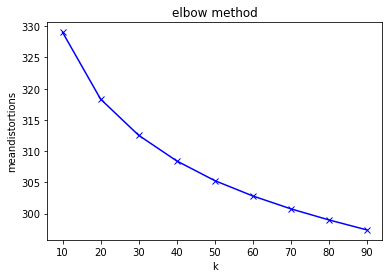

In [ ]:
ranges = range(10,100,10)
meandistortions=[]
for i in trange(len(ranges)):
    time.sleep=0.01
    k = ranges[i]
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(all_distances)
    meandistortions.append(sum(np.min(cdist(all_distances,kmeans.cluster_centers_,'euclidean'),axis=1))/all_distances.shape[0])
    
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('meandistortions')
plt.title('elbow method')

In [ ]:
meandistortions

[329.0447688203965,
 318.3286748233772,
 312.5367063935766,
 308.4308208913343,
 305.2742362395582,
 302.8164669023301,
 300.7516739508842,
 298.97802382696284,
 297.37299696268633]